# Distance

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

crash = pd.read_csv('crash_v2.csv')
crash.head()

,Crash Date/Time,Report Number,ACRS Report Type,Cross-Street Type,Driver At Fault,Injury Severity,Speed Limit,Parked Vehicle,Vehicle Year,Latitude,Longitude,Location,Collision,Turn,Light Conditions,Substance,Distraction,Conditions,Movement,Body,Traffic Signs,First Impact,Second Impact,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Distance_Bin,Injury_Target
0,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,Yes,NO APPARENT INJURY,35,No,2008,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,Alcohol,Distracted,DRY,Slowing,SUV,Traffic Signal/Lights,Front,Front,0,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
1,2015-01-01 00:30:00,MCP11520005,Property Damage Crash,County,No,NO APPARENT INJURY,35,No,1993,39.022001,-77.102673,"(39.02200107, -77.10267305)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Stationary,Car,Traffic Signal/Lights,Rear,Rear,1,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
2,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,No,NO APPARENT INJURY,40,No,2007,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,None Detected,Not Distracted,DRY,Turning,SUV,Traffic Signal/Lights,Rear,Rear,2,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
3,2015-01-01 01:10:00,MCP2686000D,Property Damage Crash,County,Yes,NO APPARENT INJURY,40,No,2010,39.196610,-77.265547,"(39.19661, -77.26554667)",Same Direction,No Turn,Dark,Alcohol,Not Distracted,DRY,Slowing,Car,Traffic Signal/Lights,Front,Front,3,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
4,2015-01-01 01:14:00,MCP2783000G,Injury Crash,County,No,SUSPECTED MINOR INJURY,40,No,2002,39.096217,-77.109803,"(39.09621667, -77.10980333)",Head-On Collision,No Turn,Dark,None Detected,Not Distracted,DRY,Travelling Forward,Car,Traffic Signal/Lights,Front,Front,4,2015,1,1,3,1,01:14,1,0,0,10.48,2,10-14 miles,2


In [2]:
time = crash[['Crash Date/Time', 'Crash Year', 'Crash Quarter', 
              'Crash Month', 'Crash DayOfWeek', 'Crash Hour', 
              'Is Holiday', 'Is Peak Hour', 'Is Weekend', 
              'Total Vehicles', 'Distance', 'Distance_Bin', 'Speed Limit', 
              'Latitude', 'Longitude','Injury_Target']]

In [3]:
time.head()

,Crash Date/Time,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Total Vehicles,Distance,Distance_Bin,Speed Limit,Latitude,Longitude,Injury_Target
0,2015-01-01 00:30:00,2015,1,1,3,0,1,0,0,2,14.88,10-14 miles,35,39.022001,-77.102673,0
1,2015-01-01 00:30:00,2015,1,1,3,0,1,0,0,2,14.88,10-14 miles,35,39.022001,-77.102673,0
2,2015-01-01 01:10:00,2015,1,1,3,1,1,0,0,2,1.64,0-4 miles,40,39.196610,-77.265547,0
3,2015-01-01 01:10:00,2015,1,1,3,1,1,0,0,2,1.64,0-4 miles,40,39.196610,-77.265547,0
4,2015-01-01 01:14:00,2015,1,1,3,1,1,0,0,2,10.48,10-14 miles,40,39.096217,-77.109803,2


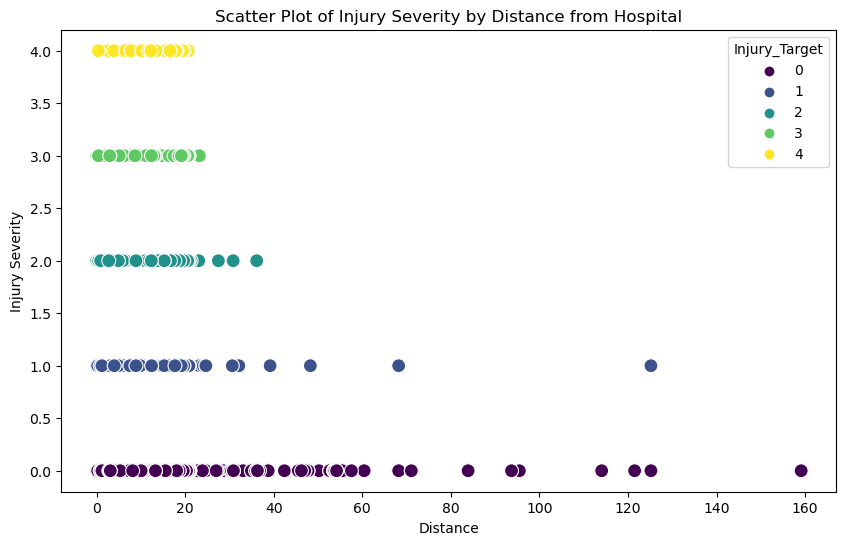

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=time, x='Distance', y='Injury_Target', hue='Injury_Target', palette='viridis', marker='o', s=100)
plt.title('Scatter Plot of Injury Severity by Distance from Hospital')
plt.xlabel('Distance')
plt.ylabel('Injury Severity')
plt.grid(False)
plt.show()

# Crashes By Injury Severity and Distance from Hospital

In [5]:
time['Crash Date/Time'] = pd.to_datetime(time['Crash Date/Time'])

# Sort by 'Crash Date/Time' 
time.sort_values(by='Crash Date/Time', inplace=True)

# Group by 'Crash Date/Time' and assign a driver count within each group
time['Driver Count'] = time.groupby('Crash Date/Time').cumcount() + 1

# Create a new column with driver labels like 'Driver_1', 'Driver_2', etc.
time['Driver Label'] = 'Driver_' + time['Driver Count'].astype(str)

# Filter data by crash (Driver_1 only) and drop No Injuries
driver_1_data = time[time['Driver Label'] == 'Driver_1']
driver_1_data = driver_1_data[driver_1_data['Injury_Target'] != 0]

# Binning distances into categories (you can adjust bins and labels as per your actual distances)
bins = [0, 5, 10, 15, 20, 50, float('inf')]
labels = ['0-4 miles', '5-9 miles', '10-14 miles', '15-19 miles', '20-49 miles', '50+ miles']
driver_1_data['Distance'] = pd.cut(driver_1_data['Distance'], bins=bins, labels=labels, right=False)

# Summary by Distance Category and Injury Severity
summary = driver_1_data.groupby(['Distance', 'Injury_Target']).size().unstack(fill_value=0)
summary.head()

/var/folders/zw/18_l5tfd0z5d7rbj_q471jqr0000gn/T/ipykernel_62626/3124409064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['Crash Date/Time'] = pd.to_datetime(time['Crash Date/Time'])
/var/folders/zw/18_l5tfd0z5d7rbj_q471jqr0000gn/T/ipykernel_62626/3124409064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time.sort_values(by='Crash Date/Time', inplace=True)
/var/folders/zw/18_l5tfd0z5d7rbj_q471jqr0000gn/T/ipykernel_62626/3124409064.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Injury_Target,1,2,3,4
Distance,,,,
0-4 miles,1804,1297,171,17
5-9 miles,1789,1327,217,33
10-14 miles,2473,1790,231,36
15-19 miles,2829,1943,227,27
20-49 miles,101,77,10,3


<Figure size 1200x800 with 0 Axes>

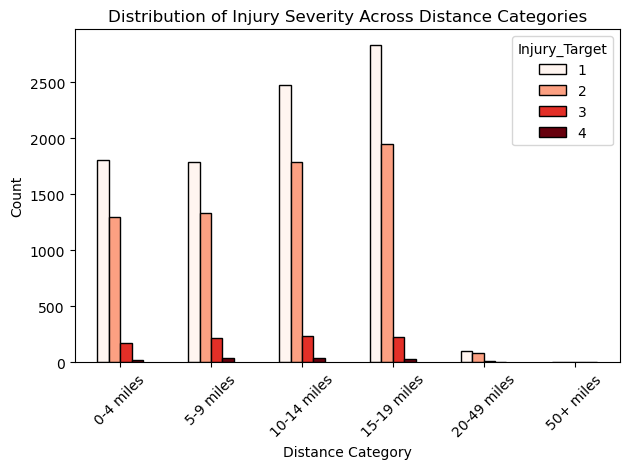

In [6]:
# Plotting clustered bar chart
plt.figure(figsize=(12, 8))

summary.plot(kind='bar', colormap='Reds', edgecolor='black')
plt.title('Distribution of Injury Severity Across Distance Categories')
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury_Target')
plt.tight_layout()

plt.show()

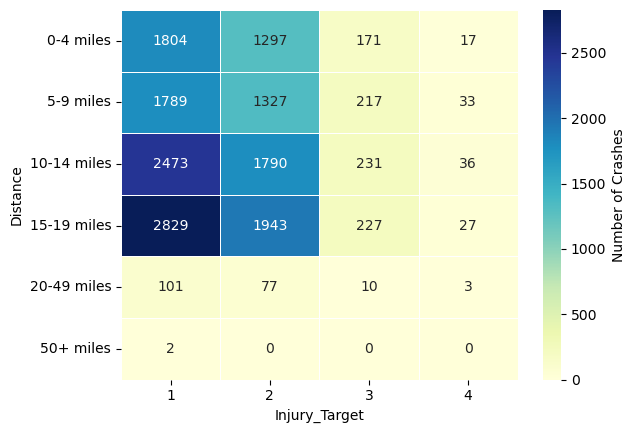

In [7]:
sns.heatmap(summary, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.show()

In [8]:
total_crashes = summary.sum().sum() 
summary_percentage = (summary / total_crashes * 100).round(2)

In [9]:
summary_percentage

Injury_Target,1,2,3,4
Distance,,,,
0-4 miles,11.00,7.91,1.04,0.10
5-9 miles,10.91,8.09,1.32,0.20
10-14 miles,15.08,10.91,1.41,0.22
15-19 miles,17.25,11.84,1.38,0.16
20-49 miles,0.62,0.47,0.06,0.02
50+ miles,0.01,0.00,0.00,0.00


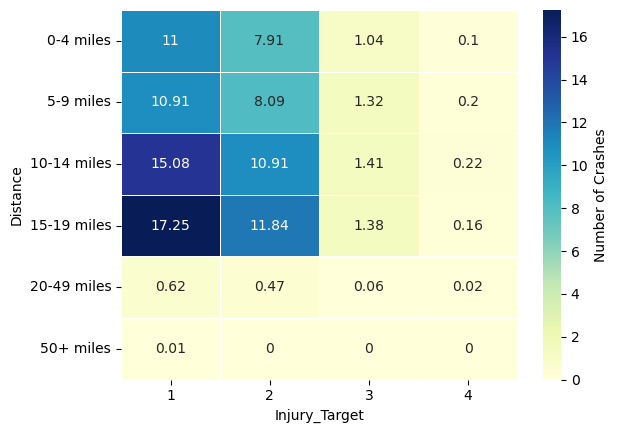

In [10]:
sns.heatmap(summary_percentage, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.show()

In [11]:
corr = crash[['Injury_Target', 'Distance', 'Total Vehicles']]
corr.corr()

,Injury_Target,Distance,Total Vehicles
Injury_Target,1.000000,-0.050326,0.032866
Distance,-0.050326,1.000000,0.029901
Total Vehicles,0.032866,0.029901,1.000000


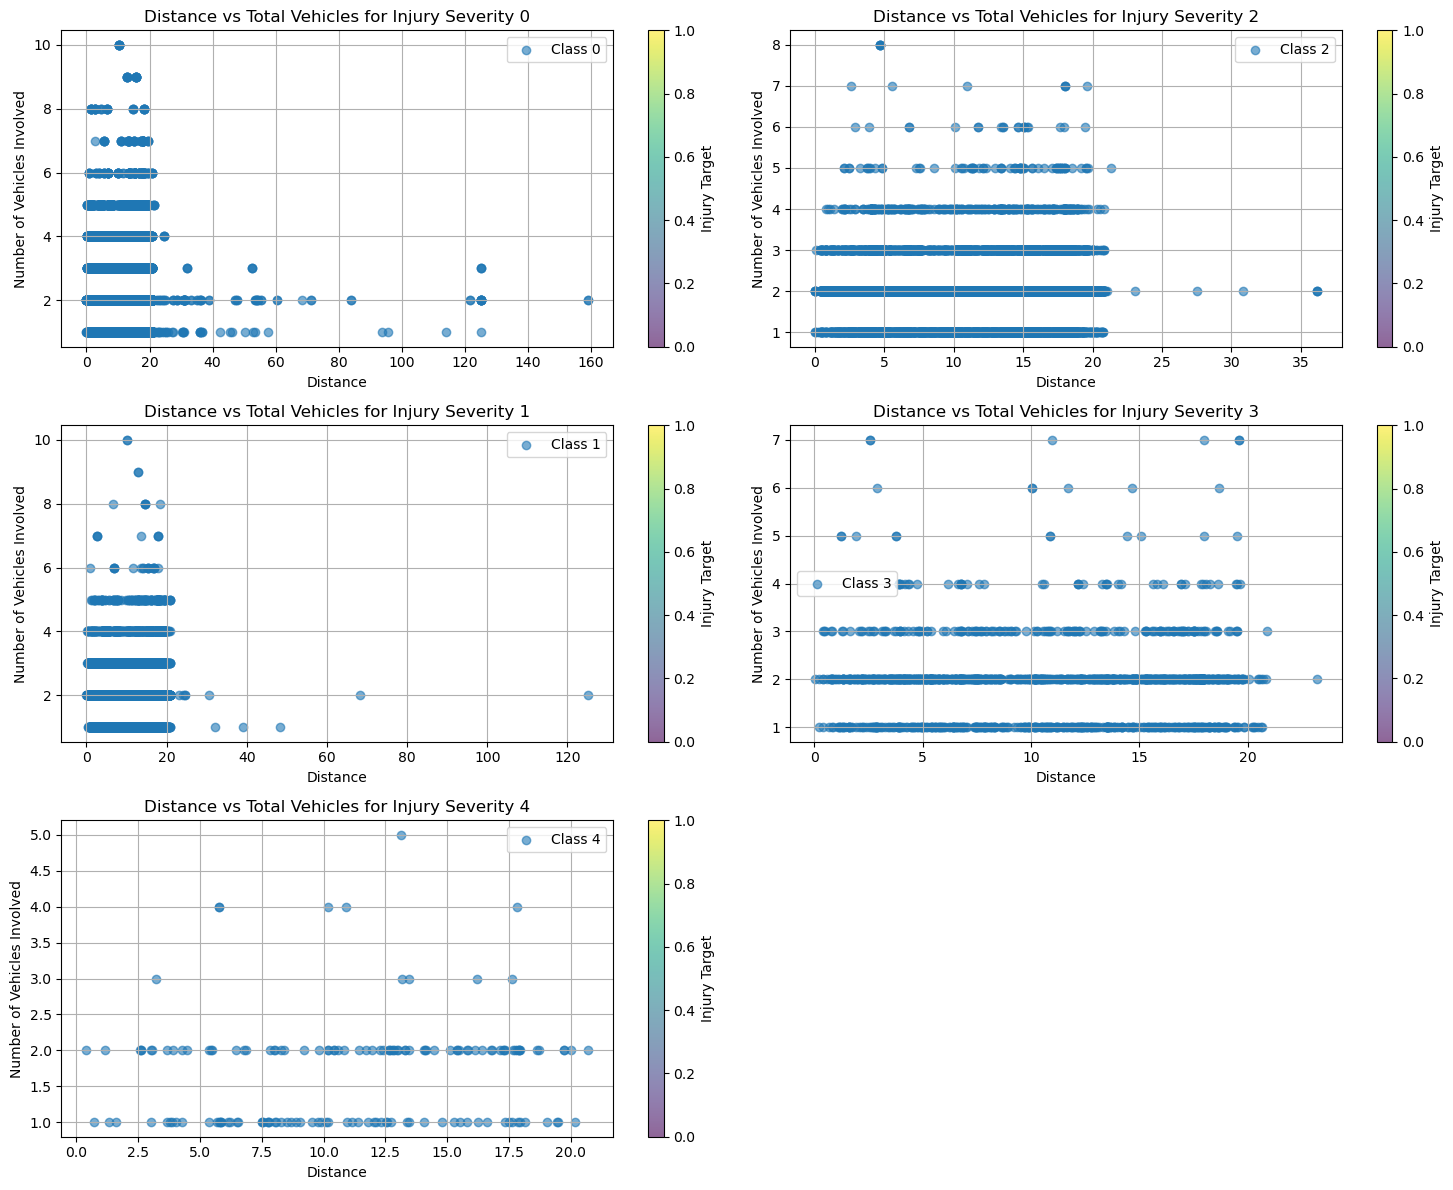

In [12]:
classes = crash['Injury_Target'].unique()

# Create separate scatter plots for each class
plt.figure(figsize=(15, 12))
for i, cls in enumerate(classes):
    plt.subplot(3, 2, i + 1)
    plt.scatter(crash.loc[crash['Injury_Target'] == cls, 'Distance'], 
                crash.loc[crash['Injury_Target'] == cls, 'Total Vehicles'], 
                cmap='viridis', alpha=0.6, label=f'Class {cls}')
    plt.colorbar(label='Injury Target')
    plt.xlabel('Distance')
    plt.ylabel('Number of Vehicles Involved')
    plt.title(f'Distance vs Total Vehicles for Injury Severity {cls}')
    plt.grid(True)
    plt.legend()
    
plt.tight_layout()
plt.show()